In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

2023-05-03 16:45:55.231769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
vueltas = pd.read_csv("../dataset_todos_pilotos/vueltas_spain_final.csv")

#vueltas.drop(['Piloto'], axis = 1, inplace = True)


In [47]:
vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020, 2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

In [48]:
vueltas_test = vueltas_test[vueltas_test['Piloto'] == "max_verstappen"]

In [49]:
vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_test = vueltas_test.drop(['anyo'], axis=1)
vueltas_train.drop(['Piloto'], axis = 1, inplace = True)
vueltas_test.drop(['Piloto'], axis = 1, inplace = True)

In [50]:
vueltas_train = vueltas_train.astype(float)
vueltas_test = vueltas_test.astype(float)

In [51]:
vueltas_test.shape

(64, 20)

In [52]:
scaler = MinMaxScaler()
scaler.fit(vueltas_train)
vueltas_train_scaler = scaler.transform(vueltas_train)
vueltas_test_scaler = scaler.transform(vueltas_test)


In [53]:
vueltas_test

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,makeStop,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
4077,87.509,2.0,5.0,0.0,1.0,1.0,0.0,36.7,0.0,7.0,49.4,2.0,87.627,87.831,2.0,13.0,0.0,0.0,1.0,0.0
4078,87.574,3.0,6.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.4,2.0,87.198,87.009,2.0,13.0,0.0,0.0,1.0,0.0
4079,87.601,4.0,7.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.5,2.0,87.671,88.177,2.0,13.0,0.0,0.0,1.0,0.0
4080,87.937,5.0,8.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.3,2.0,87.891,88.503,2.0,13.0,0.0,0.0,1.0,0.0
4081,87.761,6.0,9.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.5,2.0,87.427,88.655,2.0,13.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,86.819,61.0,17.0,1.0,1.0,4.0,0.0,36.4,0.0,11.0,48.1,1.0,89.229,86.367,2.0,66.0,0.0,1.0,0.0,0.0
4137,86.924,62.0,18.0,1.0,1.0,4.0,0.0,36.5,0.0,9.0,47.9,1.0,90.496,86.036,2.0,66.0,0.0,1.0,0.0,0.0
4138,87.205,63.0,19.0,1.0,1.0,4.0,0.0,36.5,0.0,8.0,48.0,1.0,89.829,86.218,2.0,66.0,0.0,1.0,0.0,0.0
4139,87.345,64.0,20.0,1.0,1.0,4.0,0.0,36.4,0.0,8.0,48.0,1.0,89.593,85.752,2.0,66.0,0.0,1.0,0.0,0.0


In [54]:
sum(vueltas_train['Stint'] == 4)

16

In [55]:
df = pd.DataFrame(vueltas_test_scaler)

In [56]:
df[:66]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.136404,0.000000,0.088889,0.0,0.0,0.0,0.0,1.397351,0.0,-3.007407,1.009804,0.055556,0.108344,0.110651,0.1,0.116667,0.0,0.0,1.0,0.0
1,0.137341,0.015873,0.111111,0.0,0.0,0.0,0.0,1.410596,0.0,-3.081481,1.009804,0.055556,0.103493,0.101356,0.1,0.116667,0.0,0.0,1.0,0.0
2,0.137730,0.031746,0.133333,0.0,0.0,0.0,0.0,1.417219,0.0,-3.081481,1.014706,0.055556,0.108842,0.114564,0.1,0.116667,0.0,0.0,1.0,0.0
3,0.142573,0.047619,0.155556,0.0,0.0,0.0,0.0,1.417219,0.0,-3.081481,1.004902,0.055556,0.111330,0.118250,0.1,0.116667,0.0,0.0,1.0,0.0
4,0.140036,0.063492,0.177778,0.0,0.0,0.0,0.0,1.410596,0.0,-3.081481,1.014706,0.055556,0.106083,0.119969,0.1,0.116667,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.126458,0.936508,0.355556,1.0,0.0,1.0,0.0,1.377483,0.0,-2.711111,0.946078,0.000000,0.126460,0.094096,0.1,1.000000,0.0,1.0,0.0,0.0
60,0.127971,0.952381,0.377778,1.0,0.0,1.0,0.0,1.384106,0.0,-2.859259,0.936275,0.000000,0.140788,0.090353,0.1,1.000000,0.0,1.0,0.0,0.0
61,0.132022,0.968254,0.400000,1.0,0.0,1.0,0.0,1.384106,0.0,-2.933333,0.941176,0.000000,0.133245,0.092411,0.1,1.000000,0.0,1.0,0.0,0.0
62,0.134040,0.984127,0.422222,1.0,0.0,1.0,0.0,1.377483,0.0,-2.933333,0.941176,0.000000,0.130576,0.087141,0.1,1.000000,0.0,1.0,0.0,0.0


In [57]:
vueltas_train

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,makeStop,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
0,132.826,3.0,4.0,0.0,4.0,1.0,1.0,16.3,1.0,51.0,35.6,1.0,134.646,133.906,1.0,25.0,0.0,0.0,1.0,0.0
1,128.778,4.0,5.0,0.0,4.0,1.0,0.0,15.9,1.0,52.0,34.0,1.0,133.632,128.681,1.0,25.0,0.0,0.0,1.0,0.0
2,130.044,5.0,6.0,0.0,4.0,1.0,0.0,16.1,1.0,52.4,36.2,1.0,127.041,129.827,1.0,25.0,0.0,0.0,1.0,0.0
3,133.088,6.0,7.0,0.0,4.0,1.0,0.0,16.7,0.0,51.5,36.6,1.0,119.521,133.232,1.0,25.0,0.0,0.0,1.0,0.0
4,82.099,7.0,8.0,0.0,1.0,1.0,0.0,16.4,0.0,50.3,36.7,1.0,90.479,83.604,1.0,25.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,87.714,2.0,2.0,1.0,1.0,1.0,0.0,21.7,0.0,58.0,31.6,17.0,88.135,88.774,16.0,6.0,0.0,0.0,1.0,0.0
4073,86.076,3.0,3.0,1.0,1.0,1.0,0.0,21.7,0.0,57.9,31.8,17.0,86.736,87.083,16.0,6.0,0.0,0.0,1.0,0.0
4074,86.189,4.0,4.0,1.0,1.0,1.0,0.0,21.8,0.0,58.5,31.6,17.0,86.209,86.223,16.0,6.0,0.0,0.0,1.0,0.0
4075,84.825,5.0,5.0,1.0,1.0,1.0,0.0,21.8,0.0,57.9,31.6,16.0,85.571,87.216,16.0,6.0,0.0,0.0,1.0,0.0


In [58]:
trainX = []
trainY = []
testX = []
testY = []
loopback = 10 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler) -future +1):
    trainX.append(vueltas_train_scaler[i-loopback:i, 0:vueltas_train.shape[1]])
    trainY.append(vueltas_train_scaler[i + future - 1:i + future, 5])
    #print(vueltas_train_scaler[i + future - 1:i + future, 5])
    
for i in range (loopback, len(vueltas_test_scaler) -future +1):
    testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
    testY.append(vueltas_test_scaler[i + future - 1:i + future,5
                                    ])



In [59]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [60]:
trainYOriginal = trainY

In [61]:
trainX.shape

(4067, 10, 20)

In [62]:
trainY.shape

(4067, 1)

In [63]:
testX.shape

(54, 10, 20)

In [64]:
testY.shape

(54, 1)

In [65]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer="adam", loss= "mse") ##Cambiar esto para la siguiente reunion (positivo 1, negativo 0)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 256)           283648    
                                                                 
 dropout_2 (Dropout)         (None, 10, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 480,897
Trainable params: 480,897
Non-trainable params: 0
_________________________________________________________________


Epoch 1/12
64/64 [==============================] - 5s 46ms/step - loss: 0.0321
Epoch 2/12
64/64 [==============================] - 3s 41ms/step - loss: 0.0145
Epoch 3/12
64/64 [==============================] - 3s 41ms/step - loss: 0.0118
Epoch 4/12
64/64 [==============================] - 3s 40ms/step - loss: 0.0105
Epoch 5/12
64/64 [==============================] - 3s 40ms/step - loss: 0.0102
Epoch 6/12
64/64 [==============================] - 3s 40ms/step - loss: 0.0104
Epoch 7/12
64/64 [==============================] - 3s 43ms/step - loss: 0.0093
Epoch 8/12
64/64 [==============================] - 3s 43ms/step - loss: 0.0091
Epoch 9/12
64/64 [==============================] - 3s 41ms/step - loss: 0.0087
Epoch 10/12
64/64 [==============================] - 3s 41ms/step - loss: 0.0086
Epoch 11/12
64/64 [==============================] - 3s 41ms/step - loss: 0.0084
Epoch 12/12
64/64 [==============================] - 3s 44ms/step - loss: 0.0084


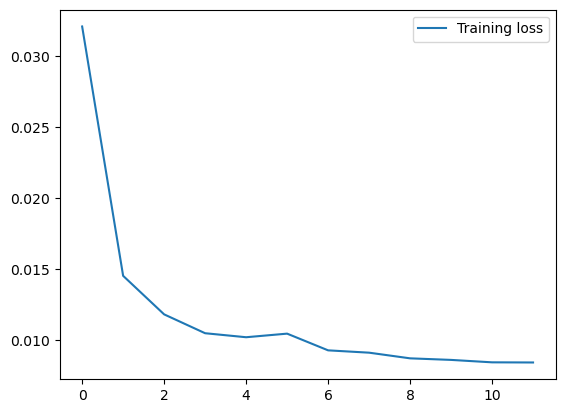

In [66]:
history = model.fit(trainX, trainY, epochs=12, batch_size=64, validation_split=0.0, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [186]:
prediction = model.predict(testX[20:21]) 
prediction

1/1 [==============================] - 0s 270ms/step


array([[0.745312]], dtype=float32)

In [188]:
testY[20]

array([0.66666667])

### Sacar métricas de lo que falla. Con el unique, ver a cual se acerca más. Sacar matrix_confusion, con este modelo.

### Ahora vamos a sacar todas las Y^ y todas las y.

In [67]:
y_real = testY.tolist()

In [68]:
"""
y_pred = []
for i in range (0, len(y_real)):
    prediction = model.predict(testX[i:i+1])     
    valor = prediction[0][0].item()
    y_pred.append(valor)
"""

'\ny_pred = []\nfor i in range (0, len(y_real)):\n    prediction = model.predict(testX[i:i+1])     \n    valor = prediction[0][0].item()\n    y_pred.append(valor)\n'

In [69]:
#Predecimos con los datos de entrenamiento, solo queremos sacar los puntos
predictions = model.predict(testX)

2/2 [==============================] - 0s 21ms/step


In [70]:
predictions

array([[0.21565266],
       [0.21990642],
       [0.222009  ],
       [0.46401542],
       [0.47347337],
       [0.47403497],
       [0.46674535],
       [0.45832768],
       [0.44929773],
       [0.43870252],
       [0.4275561 ],
       [0.42017144],
       [0.41568488],
       [0.41943443],
       [0.42083207],
       [0.42123032],
       [0.41936737],
       [0.41918686],
       [0.63299215],
       [0.5882948 ],
       [0.57281643],
       [0.5654649 ],
       [0.56242186],
       [0.5625608 ],
       [0.5650555 ],
       [0.56914586],
       [0.5740301 ],
       [0.5802542 ],
       [0.569185  ],
       [0.56140256],
       [0.55645895],
       [0.55342156],
       [0.54913163],
       [0.5702505 ],
       [0.8256567 ],
       [0.798462  ],
       [0.7959384 ],
       [0.78840977],
       [0.78106034],
       [0.7779384 ],
       [0.77742475],
       [0.77498543],
       [0.776567  ],
       [0.7627542 ],
       [0.73586965],
       [0.735842  ],
       [0.7312321 ],
       [0.724

In [71]:
clases = np.unique(trainY[:,0])
clases

array([0.        , 0.33333333, 0.66666667, 1.        ])

### Vamos a sacar los puntos que mejor separan las clases, y para ello vamos a usar una regresion logistica

In [180]:
puntos = []

In [398]:
from sklearn.linear_model import LogisticRegression
##Este calcula el punto entre la clase 2 y la 3
index0 = np.logical_or(trainY[:,0] == clases[0],trainY[:,0] == clases[1] )
index1 = np.logical_or(trainY[:,0] == clases[2],trainY[:,0] == clases[3] )
trainY[index0] = 0
trainY[index1] = 1

predictions = np.squeeze(predictions)
predictions = predictions.reshape(-1,1)
predictions.shape

trainY = np.squeeze(trainY)
trainY = trainY.reshape(-1,1)
trainY.shape

rl = LogisticRegression(random_state=0).fit(predictions, trainY)
punto = -rl.intercept_/rl.coef_
print(punto)
puntos.append(punto)

[[0.50432424]]


/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [401]:
##Este calcula el punto entre la clase 1 y la 2
index0 = trainY[:,0] == clases[0]
index1 = np.logical_or(trainY[:,0] == clases[1],trainY[:,0] == clases[2], trainY[:,0] == clases[3])
trainY[index0] = 1
trainY[index1] = 0

predictions = np.squeeze(predictions)
predictions = predictions.reshape(-1,1)
predictions.shape

trainY = np.squeeze(trainY)
trainY = trainY.reshape(-1,1)
trainY.shape

rl = LogisticRegression(random_state=0).fit(predictions, trainY)
punto = -rl.intercept_/rl.coef_
print(punto)


[[0.18204395]]


/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [419]:
clases[3]

1.0

In [430]:
index0 = trainY[:,0] != clases[3]
index1 = trainY[:,0] == clases[3]
trainY[index0] = 0
trainY[index1] = 1

predictions = np.squeeze(predictions)
predictions = predictions.reshape(-1,1)

trainY = np.squeeze(trainY)
trainY = trainY.reshape(-1,1)

rl = LogisticRegression(random_state=0).fit(predictions, trainY)
punto = -rl.intercept_/rl.coef_
print(punto)


[[1.52959326]]


/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
puntos = [0.18204395,0.50432424, 0.67542743]

In [72]:
y_pred_2 = predictions[:,0].tolist()

In [470]:
all([round(x,4) == round(y,4) for x, y in zip(y_pred, y_pred_2)])

False

In [73]:
y_pred = y_pred_2

In [74]:
print(len(y_real), len(y_pred))

54 54


In [75]:
uniques = set(tuple(x) for x in y_real)
uniques = [list(x) for x in uniques]

In [76]:
uniques

[[0.0], [1.0], [0.6666666666666667], [0.3333333333333333]]

In [94]:
#Esto es cogiendo el punto medio entre las dos clases
y_pred_normalized = []
for val in y_pred:
    if (val<puntos[0]):
        y_pred_normalized.append(uniques[0][0])
    if (val>=puntos[0] and val<puntos[1]):
        y_pred_normalized.append(uniques[3][0])
    if (val>=puntos[1] and val<puntos[2]):
        y_pred_normalized.append(uniques[3][0])
    if (val>=puntos[2]):
        y_pred_normalized.append(uniques[2][0])


In [159]:
#Esto es cogiendo el punto predicho con la regresion lineal entre las dos clases
y_pred_normalized = []
for val in y_pred:
    dist = [abs(val-x[0]) if x[0] != 1 else abs(val-puntos[2]) for x in uniques]
    closest_val = uniques[np.argmin(dist)][0]
    y_pred_normalized.append(closest_val)


In [77]:
#Esto es cogiendo el punto predicho con la regresion lineal entre las dos clases
y_pred_normalized = []
for val in y_pred:
    dist = [abs(val-x[0]) for x in uniques]
    closest_val = uniques[np.argmin(dist)][0]
    y_pred_normalized.append(closest_val)

In [78]:
bien_predecidas = 0
mal_predecidas = 0

for i in range (0, len(y_real)):
    if y_pred_normalized[i] == y_real[i][0]:
        bien_predecidas += 1
    else:
        mal_predecidas += 1

precision = bien_predecidas/(mal_predecidas+bien_predecidas)      

In [80]:


print("El modelo tiene una precision de: ", precision)

El modelo tiene una precision de:  0.5555555555555556


### Ahora tenemos que sacar las demás métricas y como tenemos 4 clases

### El número de stint que más veces aparece en el conjunto de test, ¿qué porcentaje sobre el total supone? 

In [81]:
frecuencias = {}

y_real_ = [sublista[0] for sublista in y_real]
frecuencias = {}
numero_mas_frecuente = None
frecuencia_maxima = 0

for numero in y_real_:
    if numero in frecuencias:
        frecuencias[numero] += 1
    else:
        frecuencias[numero] = 1

    if frecuencias[numero] > frecuencia_maxima:
        frecuencia_maxima = frecuencias[numero]
        numero_mas_frecuente = numero

print("El número que aparece con más frecuencia es:", numero_mas_frecuente)
print("Las frecuencias de cada número son:")
total = len(y_real_)

for numero, frecuencia in frecuencias.items():
    print(numero, "aparece", frecuencia, "veces que supone un", round((frecuencia/total)*100, 2), "del total")
    

El número que aparece con más frecuencia es: 1.0
Las frecuencias de cada número son:
0.0 aparece 2 veces que supone un 3.7 del total
0.3333333333333333 aparece 15 veces que supone un 27.78 del total
0.6666666666666667 aparece 16 veces que supone un 29.63 del total
1.0 aparece 21 veces que supone un 38.89 del total


In [82]:
clases = [str(sublista[0]) for sublista in uniques]
#Tenemos las clases en tipo string
clases

['0.0', '1.0', '0.6666666666666667', '0.3333333333333333']

### Ahora tenemos la lista clases, que son nuestras 4 clases para clasificar. Asi que vamos a pasar las clases a string, y vamos a sacar FN, FP, TP, TN

In [83]:
y_real_str = [str(sublista) for sublista in y_real_]
y_pred_normalized_str = [str(sublista) for sublista in y_pred_normalized]

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
# Calcular la matriz de confusión
cm = confusion_matrix(y_real_str, y_pred_normalized_str, labels=clases)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(clases)
print(cm)

# Imprimir las métricas básicas
print("Métricas:")
print(classification_report(y_real_str, y_pred_normalized_str, labels=clases))

Matriz de confusión:
['0.0', '1.0', '0.6666666666666667', '0.3333333333333333']
[[ 0  0  0  2]
 [ 0  0 21  0]
 [ 0  0 15  1]
 [ 0  0  0 15]]
Métricas:
                    precision    recall  f1-score   support

               0.0       0.00      0.00      0.00         2
               1.0       0.00      0.00      0.00        21
0.6666666666666667       0.42      0.94      0.58        16
0.3333333333333333       0.83      1.00      0.91        15

          accuracy                           0.56        54
         macro avg       0.31      0.48      0.37        54
      weighted avg       0.35      0.56      0.42        54



/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Cuidado, ¿puede haber desbalanceo de clases?